In [1]:
# pip install -U marshmallow

In [1]:
import os

In [2]:
import numpy as np

In [3]:
import pandas as pd


In [4]:
import logging
import logging.config

In [5]:
path = r'C:\Users\ML\PycharmProjects\Titanic 2002\000 MLProdHW2\ml_project'

In [6]:
data_raw = pd.read_csv(path + r'\data\raw\healthcare-dataset-stroke-data.csv')

In [7]:
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
data = data_raw.copy()
data = data.dropna()

In [9]:
work_type_data = pd.get_dummies(data['work_type'], prefix='work')

In [10]:
smoking_status = pd.get_dummies(data['smoking_status'], prefix='smoking')

In [11]:
data_prepared = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi']]

In [12]:
data_prepared = pd.concat([data_prepared, work_type_data, smoking_status], axis=1).drop(columns=['smoking_Unknown'])
data_prepared['gender'] = data_prepared['gender'].map(lambda x: int(x == 'Male'))
data_prepared['ever_married'] = data_prepared['ever_married'].map(lambda x: int(x == 'Yes'))
data_prepared['stroke'] = data['stroke']
data_prepared

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes,stroke
0,1,67.0,0,1,1,228.69,36.6,0,0,1,0,0,1,0,0,1
2,1,80.0,0,1,1,105.92,32.5,0,0,1,0,0,0,1,0,1
3,0,49.0,0,0,1,171.23,34.4,0,0,1,0,0,0,0,1,1
4,0,79.0,1,0,1,174.12,24.0,0,0,0,1,0,0,1,0,1
5,1,81.0,0,0,1,186.21,29.0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,103.08,18.6,0,0,0,0,1,0,0,0,0
5106,0,81.0,0,0,1,125.20,40.0,0,0,0,1,0,0,1,0,0
5107,0,35.0,0,0,1,82.99,30.6,0,0,0,1,0,0,1,0,0
5108,1,51.0,0,0,1,166.29,25.6,0,0,1,0,0,1,0,0,0


In [13]:
data_prepared[data_prepared['gender'] == 1]

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes,stroke
0,1,67.0,0,1,1,228.69,36.6,0,0,1,0,0,1,0,0,1
2,1,80.0,0,1,1,105.92,32.5,0,0,1,0,0,0,1,0,1
5,1,81.0,0,0,1,186.21,29.0,0,0,1,0,0,1,0,0,1
6,1,74.0,1,1,1,70.09,27.4,0,0,1,0,0,0,1,0,1
16,1,64.0,0,1,1,191.61,37.5,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,1,57.0,0,0,1,76.62,28.2,1,0,0,0,0,0,1,0,0
5097,1,68.0,0,0,1,91.68,40.8,0,0,0,1,0,0,0,0,0
5098,1,9.0,0,0,0,71.88,17.5,0,0,0,0,1,0,0,0,0
5100,1,82.0,1,0,1,71.97,28.3,0,0,0,1,0,0,1,0,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(data_prepared, test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
linear_model = LogisticRegression(max_iter=2000).fit(train.drop(columns=['stroke']), train['stroke'])

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
linear_model.predict(test.drop(columns=['stroke']))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
accuracy_score(test['stroke'], linear_model.predict(test.drop(columns=['stroke'])))

0.9506172839506173

In [24]:
def draw_auc_sklearn(X_train, y_train, X_test, y_test, model):
  import matplotlib.pyplot as plt
  from sklearn.metrics import roc_auc_score, roc_curve

  for name, X, y, model in [
      ('train', X_train, y_train, model),
      ('test ', X_test, y_test, model)
  ]:
      proba = model.predict_proba(X)[:, 1]
      auc = roc_auc_score(y, proba)
      plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

  plt.plot([0, 1], [0, 1], '--', color='black',)
  plt.legend(fontsize='large')
  plt.grid()

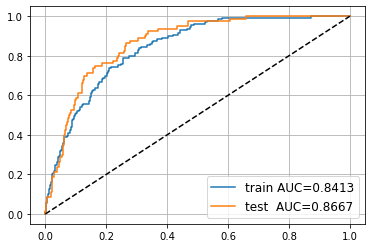

In [25]:
draw_auc_sklearn(train.drop(columns=['stroke']), train['stroke'], test.drop(columns=['stroke']), test['stroke'], linear_model)

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
naive_bayes_model = GaussianNB().fit(train.drop(columns=['stroke']), train['stroke'])

In [28]:
accuracy_score(test['stroke'], naive_bayes_model.predict(test.drop(columns=['stroke'])))

0.5574074074074075

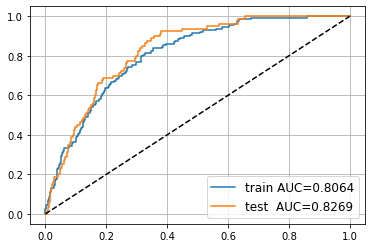

In [29]:
draw_auc_sklearn(train.drop(columns=['stroke']), train['stroke'], test.drop(columns=['stroke']), test['stroke'], naive_bayes_model)